In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

### KNN Package

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 读取数据

In [4]:
path = 'datas/iris.data'
names = ['sepal length','sepal width','petal length','petal width','cla']
df = pd.read_csv(path,header=None,names=names)
df.head()

,sepal length,sepal width,petal length,petal width,cla
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['cla'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: cla, dtype: int64

### 类别变换

In [11]:
def parseRecord(record):
    result = []
    r = zip(names,record)
    for name,v in r:
        if name == 'cla':    
            if v== 'Iris-setosa':
                result.append(1)
            elif v== 'Iris-versicolor':
                result.append(2)
            elif v== 'Iris-virginica':
                result.append(3)
            else:
                result.append(np.nan)
        else:
            result.append(float(v))
    return result

In [12]:
#数据转换
datas = df.apply(lambda r: pd.Series(parseRecord(r),index=names),axis=1)
datas.head()

,sepal length,sepal width,petal length,petal width,cla
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [14]:
#异常数据处理
datas = datas.dropna(how = 'any')
#划分X，Y
X = datas[names[0:-1]]
Y = datas[names[-1]]
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 分割训练集 测试集

In [17]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.4,random_state=0)

In [18]:
X_train.shape

(90, 4)

### 模型训练

In [21]:
#训练拟合
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

#查看效果
knn.score(X_train,Y_train)

0.9888888888888889

In [22]:
#预测集效果
knn_y_predict = knn.predict(X_test)

In [23]:
knn.score(X_test,Y_test)

0.9333333333333333

### 可视化

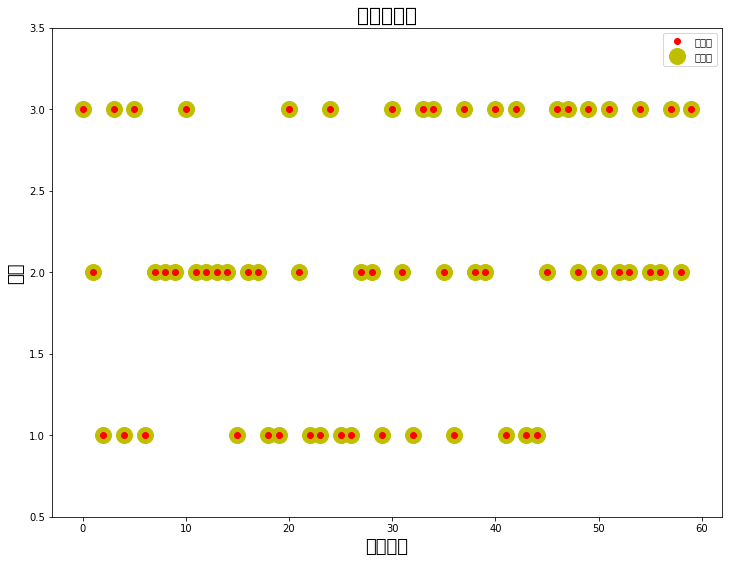

In [26]:
x_test_len = range(len(X_test))
plt.figure(figsize=(12,9),facecolor='w')
plt.ylim(0.5,3.5)

#绘制真实值
plt.plot(x_test_len,knn_y_predict,'ro',markersize=6,zorder = 3,label = u'真实值')

#绘制预测值
plt.plot(x_test_len,knn_y_predict,'yo',markersize=16,zorder = 1,label = u'预测值')
plt.legend(loc ='upper right')
plt.xlabel(u'数据编号',fontsize = 18)
plt.ylabel(u'种类',fontsize = 18)
plt.title(u'鸢尾花分类',fontsize = 20)
plt.show()